In [31]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import pyarrow as pa
import pyarrow.parquet as pq
from sklearn.ensemble import IsolationForest
import numpy as np

In [20]:
# Configuraci칩n de rutas y carga de dataset

base_path = os.path.dirname(os.getcwd())
config_path = os.path.join(base_path, "config.json")
    
with open(config_path, "r") as f:
    config = json.load(f)


data_path = os.path.join(base_path, config["paths"]["data"])
outputs_path = os.path.join(base_path, config["paths"]["outputs"], "descriptive_analysis")
parquet_path = os.path.join(base_path, config["paths"]["intermediate"]["encoded"])
os.makedirs(outputs_path, exist_ok=True)

# Dataset
dataset_file = os.path.join(data_path, config["parameters"]["01_LecturayAnalisis"]["dataset_file"])
df_triage = pd.read_csv(dataset_file)
print(f"Dataset cargado. Dimensiones: {df_triage.shape}")


Dataset cargado. Dimensiones: (560486, 543)


In [21]:
def analyze_and_fill_nulls(df, output_path):
    # Asegurarse de que la carpeta de salida exista
    if not os.path.exists(output_path):
        print(f"Error: La carpeta especificada no existe: {output_path}")
        return df

    # An치lisis inicial de valores nulos
    na_report = pd.DataFrame({
        "Count": df.isnull().sum(),
        "Percentage": (df.isnull().sum() / len(df)) * 100
    })
    
    # Filtrar columnas con valores nulos
    na_report_with_nulls = na_report[na_report["Count"] > 0].sort_values(by="Count", ascending=False)
    
    # Guardar reporte inicial
    report_path = os.path.join(output_path, "reporte_valores_nulos_inicial.csv")
    na_report_with_nulls.to_csv(report_path)
    print(f"Reporte inicial de valores nulos guardado en: {report_path}")
    print("\nColumnas con valores nulos antes de rellenar:")
    print(na_report_with_nulls)
    
    # Obtener la lista de columnas con valores nulos para rellenar con la mediana
    columns_with_nulls = na_report_with_nulls.index.tolist()
    
    # Rellenar valores nulos con la mediana
    for col in columns_with_nulls:
        if df[col].isna().sum() > 0:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
    
    # Verificaci칩n posterior al rellenado
    verification_report = pd.DataFrame({
        "Remaining_Nulls": df[columns_with_nulls].isnull().sum(),
        "Percentage": (df[columns_with_nulls].isnull().sum() / len(df)) * 100
    })
    
    # Guardar reporte de verificaci칩n
    verification_path = os.path.join(output_path, "reporte_verificacion_nulls.csv")
    verification_report.to_csv(verification_path)
    print(f"\nReporte de verificaci칩n guardado en: {verification_path}")
    print("\nValores nulos restantes despu칠s de rellenar con la mediana:")
    print(verification_report)
    
    return df

# Aplicar a df_triage
df_triage_encoded = analyze_and_fill_nulls(df_triage, output_path=outputs_path)

Reporte inicial de valores nulos guardado en: c:\Users\Administrador\Documents\PythonScripts\Tesis\tesisaustral\outputs\descriptive_analysis\reporte_valores_nulos_inicial.csv

Columnas con valores nulos antes de rellenar:
                                             Count  Percentage
egfr_ultimo                                 551972   98.480961
dimero_d_ultimo                             550898   98.289342
b-typenatriureticpeptidepro(probnp)_ultimo  549577   98.053653
bilirrubinadirect_ultimo                    505193   90.134812
lactatepoc_ultimo                           503550   89.841673
troponini(poc)_ultimo                       493890   88.118169
inr_ultimo                                  482058   86.007144
albumina_ultima                             448952   80.100484
aspartatoaminotransferasa(ast)_ultimo       437527   78.062075
bollo/creatratio_ultimo                     393885   70.275618
potasio_ultimo                              351501   62.713609
aniongap_ultimo       

C:\Users\Administrador\AppData\Local\Temp\ipykernel_23780\1921964327.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\Administrador\AppData\Local\Temp\ipykernel_23780\1921964327.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co


Reporte de verificaci칩n guardado en: c:\Users\Administrador\Documents\PythonScripts\Tesis\tesisaustral\outputs\descriptive_analysis\reporte_verificacion_nulls.csv

Valores nulos restantes despu칠s de rellenar con la mediana:
                                            Remaining_Nulls  Percentage
egfr_ultimo                                               0         0.0
dimero_d_ultimo                                           0         0.0
b-typenatriureticpeptidepro(probnp)_ultimo                0         0.0
bilirrubinadirect_ultimo                                  0         0.0
lactatepoc_ultimo                                         0         0.0
troponini(poc)_ultimo                                     0         0.0
inr_ultimo                                                0         0.0
albumina_ultima                                           0         0.0
aspartatoaminotransferasa(ast)_ultimo                     0         0.0
bollo/creatratio_ultimo                                

C:\Users\Administrador\AppData\Local\Temp\ipykernel_23780\2021313017.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_triage, x=column, palette='pastel', order=custom_order)


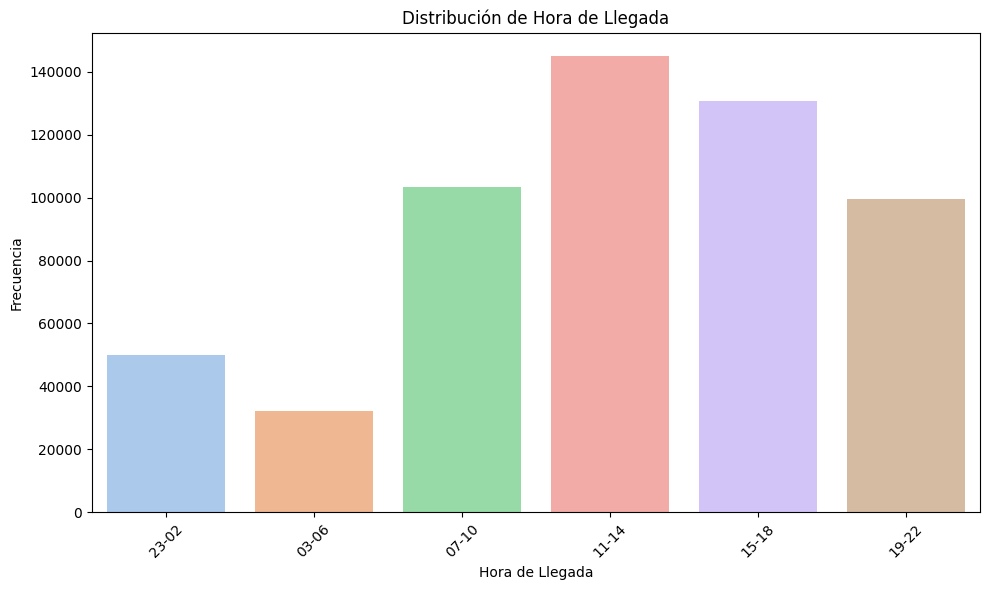

C:\Users\Administrador\AppData\Local\Temp\ipykernel_23780\2021313017.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_triage, x=column, palette='pastel')


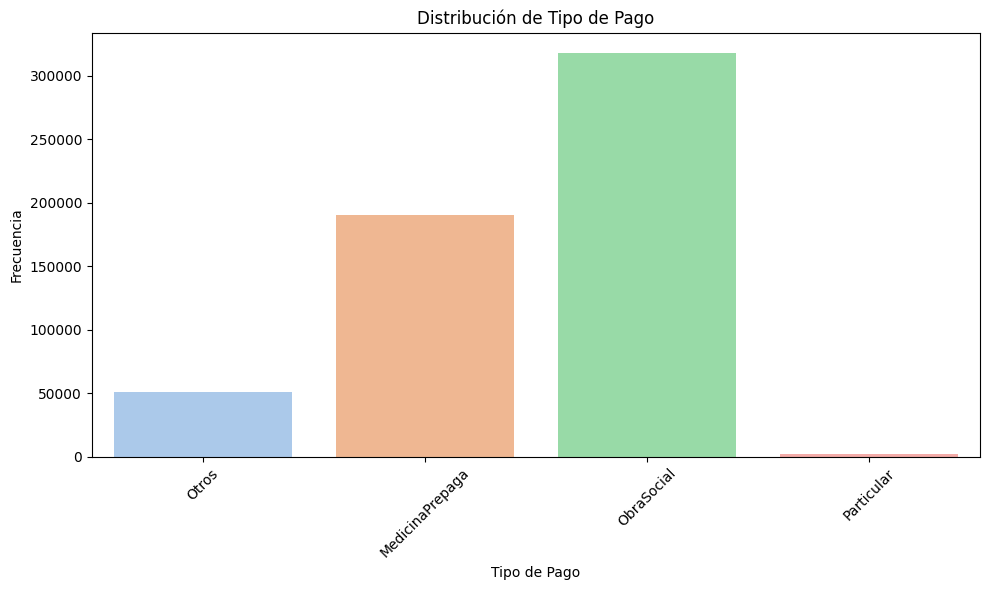

C:\Users\Administrador\AppData\Local\Temp\ipykernel_23780\2021313017.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_triage, x=column, palette='pastel')


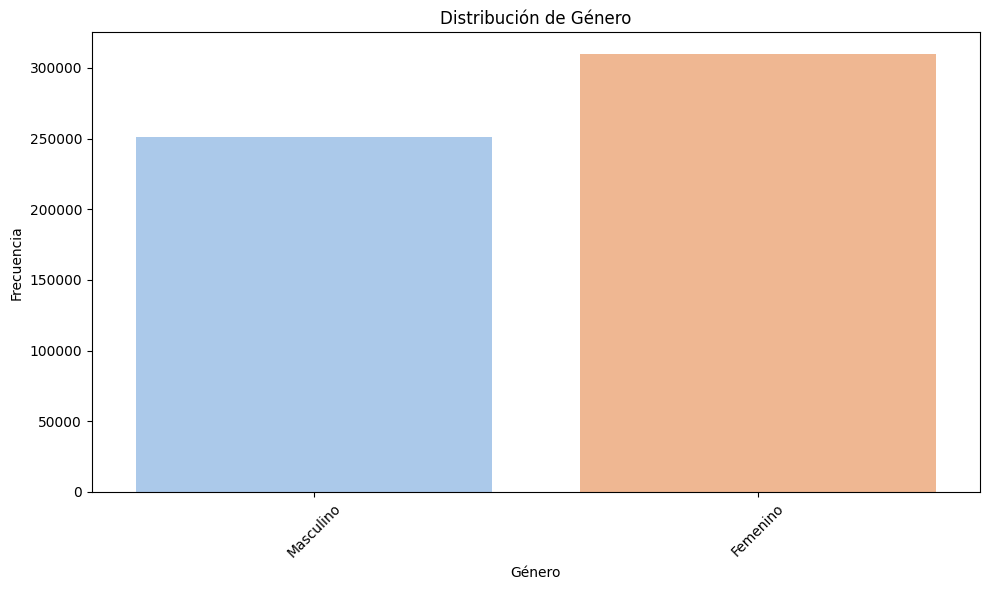

C:\Users\Administrador\AppData\Local\Temp\ipykernel_23780\2021313017.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_triage, x=column, palette='pastel', order=custom_order)


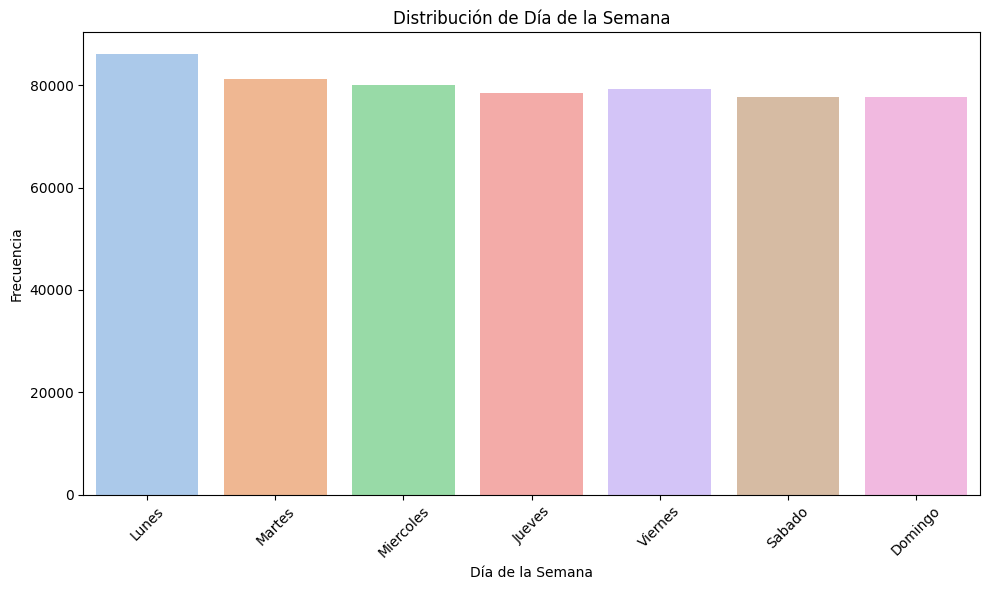

In [22]:
#An치lisis variables 
def save_and_show_plot(filename, path):
    plt.tight_layout()  # Ajusta el layout para evitar cortes
    plt.savefig(f"{path}/{filename}.png")  # Guarda el gr치fico como imagen
    plt.show()  # Muestra el gr치fico
    plt.close()  # Cierra la figura para liberar memoria

# Definir 칩rdenes personalizados
hora_order = ['23-02', '03-06', '07-10', '11-14', '15-18', '19-22']  # Orden para 'llegada_hora_bin'
dia_order = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']  # Orden para 'dia'

# Convertir columnas a tipo categ칩rico con 칩rdenes personalizados
df_triage['llegada_hora_bin'] = pd.Categorical(df_triage['llegada_hora_bin'], categories=hora_order, ordered=True)
df_triage['dia'] = pd.Categorical(df_triage['dia'], categories=dia_order, ordered=True)

# Lista de columnas, t칤tulos y 칩rdenes personalizados (si aplica)
columns_and_titles = [
    ('llegada_hora_bin', 'Hora de Llegada', hora_order),
    ('TipoCobertura', 'Tipo de Pago', None),  # Sin orden personalizado
    ('genero', 'G칠nero', None),  # Sin orden personalizado
    ('dia', 'D칤a de la Semana', dia_order)  # Con orden personalizado
]

# Generar gr치ficos para cada columna
for column, title, custom_order in columns_and_titles:
    # Crear el gr치fico
    plt.figure(figsize=(10, 6))
    
    # Si hay un orden personalizado, usarlo
    if custom_order:
        sns.countplot(data=df_triage, x=column, palette='pastel', order=custom_order)
    else:
        sns.countplot(data=df_triage, x=column, palette='pastel')
    
    plt.title(f'Distribuci칩n de {title}')
    plt.xlabel(title)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
    
    # Guardar y mostrar el gr치fico
    save_and_show_plot(column.lower(), outputs_path)

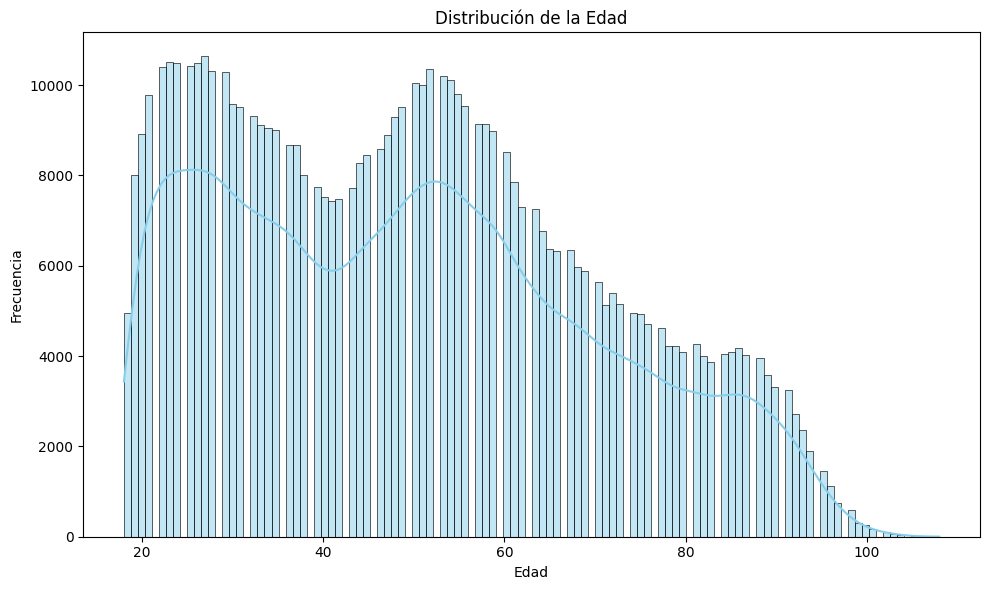

In [23]:
#An치lisis meses
# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_triage['edad'], kde=True, color='skyblue')  # Histograma con curva de densidad
plt.title('Distribuci칩n de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Guardar el gr치fico como imagen
plt.tight_layout()  # Ajusta el layout para evitar cortes
plt.savefig(f"{outputs_path}/edad.png")  # Guarda el gr치fico en la ruta especificada
plt.show()  # Muestra el gr치fico
plt.close()  # Cierra la figura para liberar memoria


Generando gr치fico de proporci칩n de niveles de triage...

Distribuci칩n de niveles de triage:
nivel_triage
5    155452
4    122839
3    113390
2     94850
1     73955
Name: count, dtype: int64


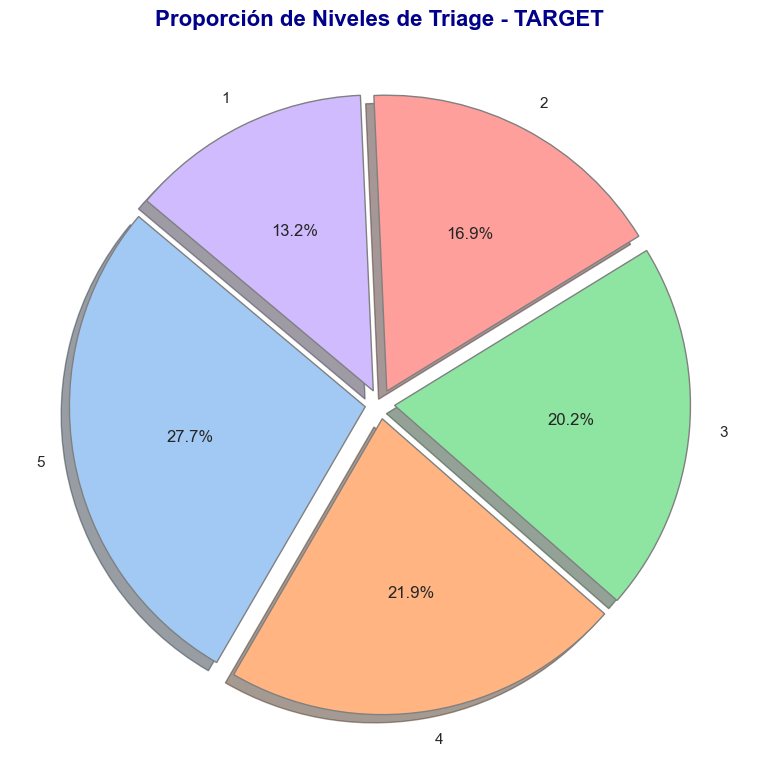

In [24]:
def save_and_show_plot(filename, path):
    """
    Guarda el gr치fico como una imagen y lo muestra.
    """
    plt.tight_layout()  # Ajusta el layout para evitar cortes
    plt.savefig(f"{path}/{filename}.png", dpi=300, bbox_inches='tight')  # Guarda el gr치fico como imagen
    plt.show()  # Muestra el gr치fico
    plt.close()  # Cierra la figura para liberar memoria

# Funci칩n para graficar la distribuci칩n de triage
def plot_triage_distribution(df, outputs_path):
    print("\nGenerando gr치fico de proporci칩n de niveles de triage...")
    
    # Contar la cantidad de ocurrencias de cada nivel de triage
    nivel_triage_counts = df['nivel_triage'].value_counts()
    
    print("\nDistribuci칩n de niveles de triage:")
    print(nivel_triage_counts)
    
    # Configurar el estilo de Seaborn
    sns.set(style="whitegrid")
    
    # Crear el gr치fico circular mejorado
    plt.figure(figsize=(10, 8))
    
    # Definir colores pastel
    colors = sns.color_palette("pastel")
    
    # Crear el gr치fico circular con mejoras
    plt.pie(
        nivel_triage_counts,
        labels=nivel_triage_counts.index,  # Usar los n칰meros originales como etiquetas
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1},
        explode=[0.05] * len(nivel_triage_counts),  # Separar las porciones
        shadow=True  # A침adir sombras
    )
    
    # T칤tulo mejorado
    plt.title('Proporci칩n de Niveles de Triage - TARGET', fontsize=16, weight='bold', color='darkblue')
    
    # Guardar y mostrar el gr치fico
    save_and_show_plot("triage_distribution", outputs_path)

plot_triage_distribution(df_triage, outputs_path)


Analizando la distribuci칩n de clases de la variable target...

Distribuci칩n de clases:
nivel_triage
5    155452
4    122839
3    113390
2     94850
1     73955
Name: count, dtype: int64

Raz칩n de clase mayoritaria a clase minoritaria: 2.10


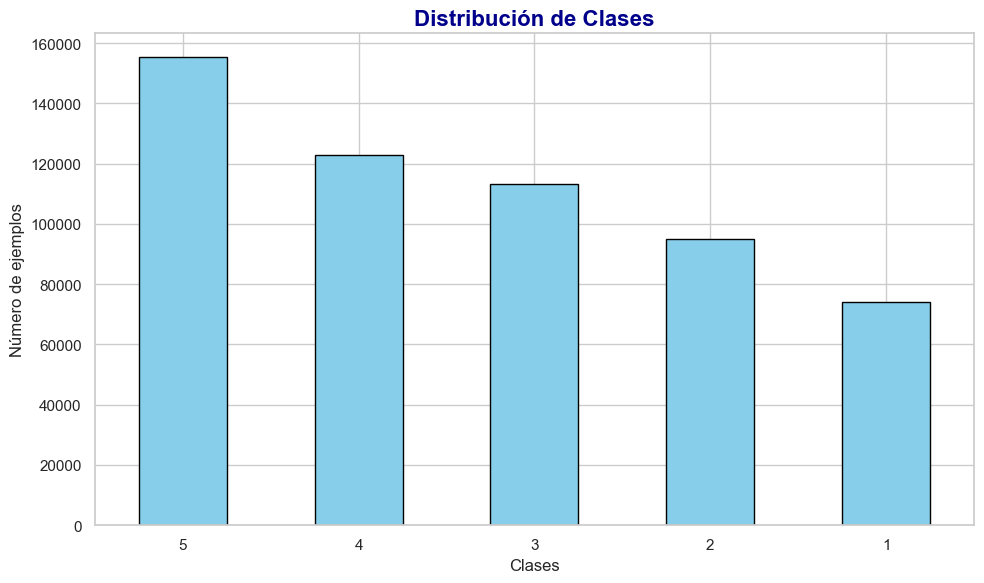

In [25]:
#analisis clase
# Funci칩n para guardar y mostrar el gr치fico
def save_and_show_plot(filename, path):
    """
    Guarda el gr치fico como una imagen y lo muestra.
    """
    plt.tight_layout()  # Ajusta el layout para evitar cortes
    plt.savefig(f"{path}/{filename}.png", dpi=300, bbox_inches='tight')  # Guarda el gr치fico como imagen
    plt.show()  # Muestra el gr치fico
    plt.close()  # Cierra la figura para liberar memoria

# Funci칩n para analizar la distribuci칩n de clases de la variable target
def analyze_target_class_distribution(df, target_col, outputs_path):
    print("\nAnalizando la distribuci칩n de clases de la variable target...")

    # Verificar la distribuci칩n de clases
    class_distribution = df[target_col].value_counts()

    # Imprimir la distribuci칩n de clases
    print("\nDistribuci칩n de clases:")
    print(class_distribution)

    # Calcular la raz칩n de clase mayoritaria a clase minoritaria
    class_ratio = class_distribution.max() / class_distribution.min()
    print(f"\nRaz칩n de clase mayoritaria a clase minoritaria: {class_ratio:.2f}")

    # Visualizar la distribuci칩n de clases
    plt.figure(figsize=(10, 6))
    class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribuci칩n de Clases', fontsize=16, weight='bold', color='darkblue')
    plt.xlabel('Clases', fontsize=12)
    plt.ylabel('N칰mero de ejemplos', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Guardar y mostrar el gr치fico
    save_and_show_plot("class_distribution", outputs_path)

# Llamada a la funci칩n (ejemplo)
analyze_target_class_distribution(df_triage, 'nivel_triage', outputs_path)


In [26]:
#columnas dolencias
dolencias = ['cc_abdominalcramping','cc_distension_abdominal','cc_dolorabdominal','cc_dolorabdominalembarazada','cc_abnormallab','cc_absceso','problema_de_adiccion_cc','cc_agitacion','cc_alcoholintoxicacion','cc_problemaalcohol','cc_reaccionalergica','cc_alteredmentalstatus','cc_animalbite','cc_lesiondetobillo','cc_dolor_tobillo','cc_ansiedad','cc_lesion_brazo','cc_dolor_brazo','cc_hinchazon_brazo','cc_victima_agresion','cc_asma','cc_dolor_espalda','cc_sangrado_moretones','cc_borrosavision','cc_exposicion_fluidos_corporales','cc_dolor_de_pecho','cc_dificultad_respiratoria','cc_problema_de_respiracion','cc_quemadura','cc_paro_cardiaco','cc_celulitis','cc_dolor_pecho','cc_opresion_pecho','cc_escalofrios','cc_resfrio','cc_confusion','cc_conjuntivitis','cc_estrenimiento','cc_tos','cc_quiste','cc_disminucion_del_azucar_en_la_sangre-sintomatico','cc_deshidratacion','cc_dolor_dental','cc_depresion','cc_desintoxicacion','cc_diarrea','cc_mareos','cc_evaluacion_adiccion','cc_problemadedrogas','cc_disnea','cc_disuria','cc_dolor_oido','problema_cc_oido','cc_edema','cc_dolor_codo','cc_azucar_sangre_asintomatico','cc_azucar_sangre_sintomatico','cc_emesis','cc_dolorepigastrico','cc_epistaxis','cc_exposicion_ETS','cc_laceracion_extremidad','cc_extremidaddebilidad','cc_lesion_ocular','cc_dolor_ojos','cc_problema_ocular','cc_enrojecimiento_ojos','cc_lesion_facial','cc_laceracion_facial','cc_dolor_facial','cc_hinchazon_facial','cc_caida','cc_caida_mas_65','cc_fatiga','cc_problema_femenino','fiebre_cc','cc_fiebre_mas_75','cc_fiebre_9a74','cc_fiebre_inmunodepresion','cc_lesiondedos','cc_dolordedos','cc_hinchazon_dedos','cc_dolor_flanco','cc_seguimiento-celulitis','cc_injuriadelpie','cc_dolor_pie','cc_hinchazon_pie','cc_cuerpo_extra침o_en_ojo','cc_trauma_total','cc_dolores_generalizados','cc_sangrado_gastrico','problema_cc_gi','cc_dolor_ingle','cc_alucinaciones','cc_lesion_mano','cc_dolor_mano','dolor_de_cabeza_cc','cc_dolor_cabeza_nuevos_sintomas','cc_dolor_cabeza_recurrente','cc_dolor_cabeza_evaluacion','cc_lesion_cabeza','cc_laceracion_cabeza','cc_hematuria','cc_hemoptisis','cc_dolor_cadera','cc_homicida','cc_hiperglucemia','cc_hipertension','cc_hipotension','cc_influenza','cc_ingestion','cc_picadura_insecto','cc_latidoirregular','cc_dolor_mandibula','cc_hinchazon_de_las_articulaciones','cc_lesionderodilla','cc_rodilla','cc_laceracion','cc_lesion_pierna','cc_dolor_pierna','cc_hinchazon_pierna','cc_letargo','cc_perdida_conocimiento','cc_maleguproblema','cc_masa','cc_problemamedico','cc_examen_medico','cc_problemademedicamento','cc_recargademedicamento','cc_migrana','cc_modificadotrauma','cc_accidente_automovilistico','cc_maccidente_motocicleta','cc_caidas_multiples','cc_congestion_nasal','cc_nauseas','cc_sincope','cc_dolor_cuello','cc_problemaneurologico','cc_entumecimiento','cc_hinchazon_bucal','cc_otalgia','cc_otro','cc_sobredosis-accidental','cc_sobredosis-intencional','cc_dolor','cc_palpitaciones','cc_ataque_panico','cc_dolor_pelvico','envenenamiento_cc','cc_post-opproblema','cc_evaluacion_psiquitatrica','sintomas_psicoticos','cc_erupcion','cc_sangradorectal','cc_dolor_rectal','cc_distressrespiratorio','cc_lesion_costillas','cc_dolor_costillas','cc_convulsiones_nuevo','cc_convulciones_antecedentes','cc_convulsiones','cc_falta_de_aliento','cc_lesiondehombro','cc_dolor_de_hombro','cc_dolor_celulas_falciformes','problema_cc_sinusal','cc_irritacionde_la_piel','cc_problema_piel','cc_dolor_de_garganta','cc_control_estandar','cc_alerta_ACV','cc_suicida','cc_retiro_sutura','cc_cuerpo_extra침o_ingerido','cc_sincope','cc_testiclepain','cc_thumbinjury','cc_tickremoval','cc_toeinjury','cc_toepain','cc_trauma','cc_unresponsive','cc_uri','cc_frecuenciaurinaria','cc_retencionurinaria','cc_infeccion_del_tracto_urinario','cc_sangradovaginal','cc_descargavaginal','cc_dolor_vaginal','cc_debilidad','cc_sibilancias','cc_retiro-alcohol','cc_verificacion_de_heridas','cc_infeccion_de_heridas','cc_evaluacion-herida','cc_lesiondemuneca','cc_dolor_de_muneca']


Calculando la frecuencia de dolencias...

Frecuencia de dolencias calculada:
cc_dolorabdominal      54345
cc_otro                51025
cc_dolor_pecho         35798
cc_falta_de_aliento    24666
cc_dolor_espalda       20643
                       ...  
cc_sangradorectal        233
cc_celulitis             205
cc_convulsiones          170
cc_hiperglucemia         110
cc_ingestion              94
Length: 198, dtype: int64

Top 25 dolencias m치s frecuentes:
cc_dolorabdominal                  54345
cc_otro                            51025
cc_dolor_pecho                     35798
cc_falta_de_aliento                24666
cc_dolor_espalda                   20643
cc_caida                           19026
cc_alcoholintoxicacion             15939
cc_maccidente_motocicleta          14891
cc_mareos                          12789
cc_tos                             12556
cc_emesis                          11516
cc_dolor_pierna                     9923
cc_dolor_flanco                     8927
cc_dolor_c

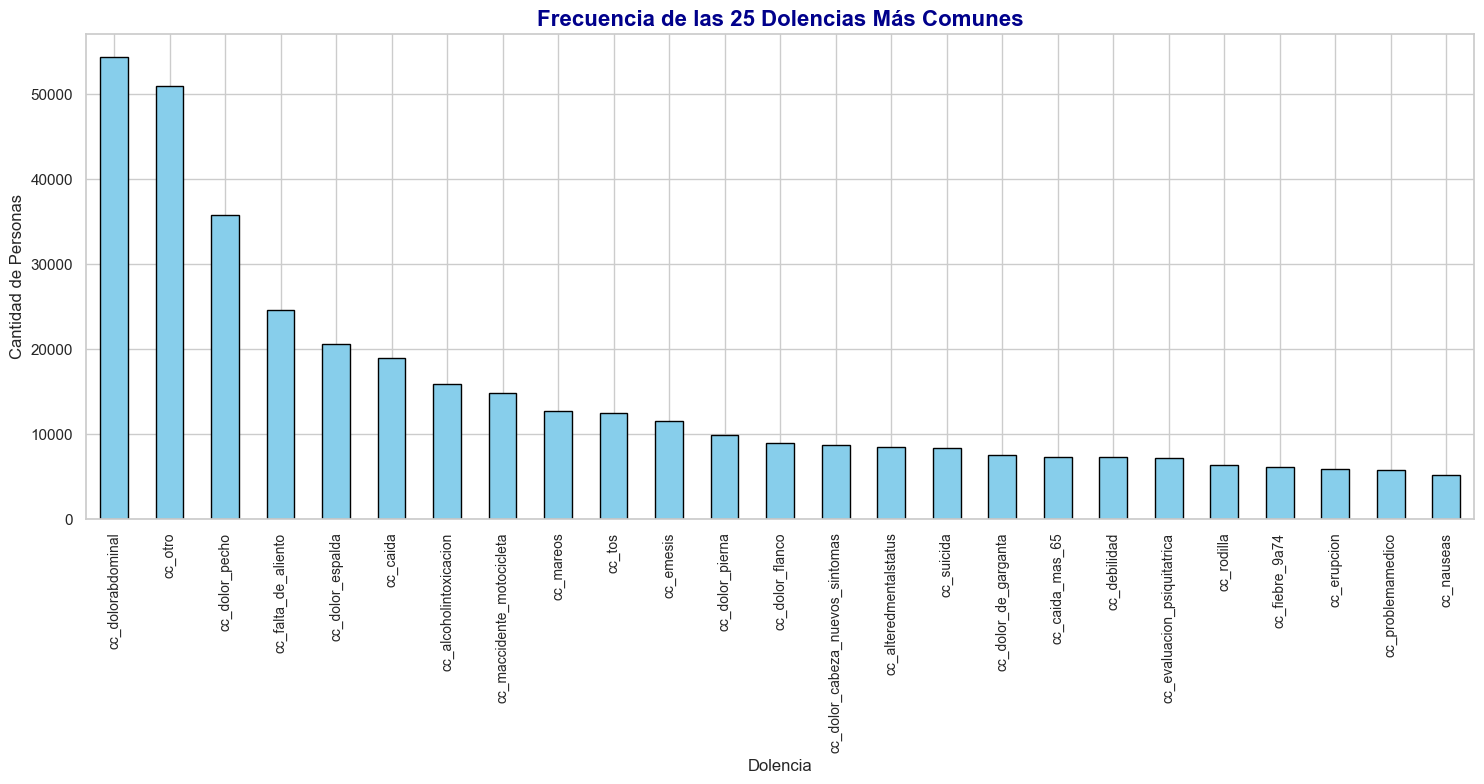

In [27]:
# Funci칩n para guardar y mostrar el gr치fico
def save_and_show_plot(filename, path):
    """
    Guarda el gr치fico como una imagen y lo muestra.
    """
    plt.tight_layout()  # Ajusta el layout para evitar cortes
    plt.savefig(f"{path}/{filename}.png", dpi=300, bbox_inches='tight')  # Guarda el gr치fico como imagen
    plt.show()  # Muestra el gr치fico
    plt.close()  # Cierra la figura para liberar memoria

# Funci칩n para analizar las dolencias m치s frecuentes
def analyze_top_dolencias(df, dolencias, outputs_path):
    print("\nCalculando la frecuencia de dolencias...")

    # Calcular la suma de cada columna booleana para obtener la cantidad de personas con cada dolencia
    dolencia_counts = df[dolencias].sum().sort_values(ascending=False)

    print("\nFrecuencia de dolencias calculada:")
    print(dolencia_counts)

    # Seleccionar las 25 dolencias m치s frecuentes
    top_25_dolencias = dolencia_counts.head(25)
    print("\nTop 25 dolencias m치s frecuentes:")
    print(top_25_dolencias)

    # Graficar el histograma
    plt.figure(figsize=(15, 8))
    top_25_dolencias.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Frecuencia de las 25 Dolencias M치s Comunes', fontsize=16, weight='bold', color='darkblue')
    plt.xlabel('Dolencia', fontsize=12)
    plt.ylabel('Cantidad de Personas', fontsize=12)
    plt.xticks(rotation=90, ha='center', fontsize=10)
    plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten

    # Guardar y mostrar el gr치fico
    save_and_show_plot("top_25_dolencias", outputs_path)

# Llamada a la funci칩n (ejemplo)
analyze_top_dolencias(df_triage, dolencias, outputs_path)


In [28]:
    campos_outliers = ['triage_vital_hr','triage_vital_sbp','triage_vital_dbp','triage_vital_rr','triaje_vital_o2','triage_vital_temp','n_visita_urgencia','n_admisiones','n_cirugias','med_combinacion_analgesica_y_antihistaminica','med_analgesicos','med_anestesicos','med_anti-obesidad','med_antialergia','med_antiartriticos','med_antiasma','med_antibioticos','med_anticoagulantes','med_antidotos','med_antifungicos','med_combinacion_de_antihistaminico_y_descongestionante','med_antihistaminicos','med_antihiperglucemicos','med_antiinfecciosos','med_antiinfectives/varios','med_antineopultimoics','med_antiparkinsondrogas','med_antiplaquetarios','med_antivirales','med_autonomas','med_cardiacos','med_cardiovasculares','med_cns','med_anticonceptivos','med_diureticos','med_gastrointestinales','med_inmunosupresores','med_investigacional','med_relajantes_musculares','med_pre-natalvitaminas','med_psicoterapeuticos','med_sedantes/hipnoticos','med_vitaminas','cxr_cuenta','cuenta_echo','recuento_electrocardiograma','headct_cuenta','mri_cuenta','otroct_cuenta','otroimg_cuenta','otrosus_cuenta','otroxr_cuenta','edad','pulso_ultimo','resp_ultimo','spo2_ultimo','temp_ultimo','sbp_ultimo','dbp_ultimo','pulso_min','resp_min','spo2_min','temp_min','sbp_min','dbp_min','pulso_max','resp_max','spo2_max','temp_max','sbp_max','dbp_max','pulso_mediana','resp_mediana','spo2_mediana','sbp_mediana','dbp_mediana','cuenta_sangre','glucosaua_cuenta','leucocitosua_cuenta','nitriteua_cuenta','proteinua_cuenta','bloodcultureroutine_cuenta','urinecultureroutine_cuenta','absolutamentemphcitocuenta_ultimo','albumina_ultima','anc(absneutrophilcuenta)_ultimo','aniongap_ultimo','aspartatoaminotransferasa(ast)_ultimo','b-typenatriureticpeptidepro(probnp)_ultimo','bilirrubinadirect_ultimo','panecillo_ultimo','bollo/creatratio_ultimo','calcio_ultimo','cloruro_ultimo','creatinina_ultimo','dimero_d_ultimo','egfr_ultimo','glucosa_ultima','hematocrito_ultimo','hemoglobina_ultima','inr_ultimo','lactatepoc_ultimo','plaquetas_ultimo','potasio_ultimo','sodio_ultimo','troponini(poc)_ultimo','wbc_ultimo']
    #campos_a_analizar = df_triage_campos_outliers  
    # Aplicar Isolation Forest
    iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=42)
    df_triage_encoded['outliers'] = iso_forest.fit_predict(df_triage_encoded[campos_outliers])

    # Filtrar los outliers detectados
    outliers = df_triage_encoded[df_triage_encoded['outliers'] == -1]

    # Calcular el porcentaje de outliers
    total_rows = len(df_triage_encoded)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / total_rows) * 100

    # Mostrar resultados
    print(f"Total de datos: {total_rows}")
    print(f"N칰mero de outliers detectados: {num_outliers}")
    print(f"Porcentaje de outliers: {percentage_outliers:.2f}%")

    # Interpretaci칩n de los resultados
    threshold = 5  # Umbral del 5% por ejemplo

    if percentage_outliers > threshold:
        print("El porcentaje de outliers es alto, lo que podr칤a indicar que los datos est치n distorsionados.")
    else:
        print("El porcentaje de outliers es bajo, probablemente no afecta significativamente el an치lisis.")

Total de datos: 560486
N칰mero de outliers detectados: 16004
Porcentaje de outliers: 2.86%
El porcentaje de outliers es bajo, probablemente no afecta significativamente el an치lisis.


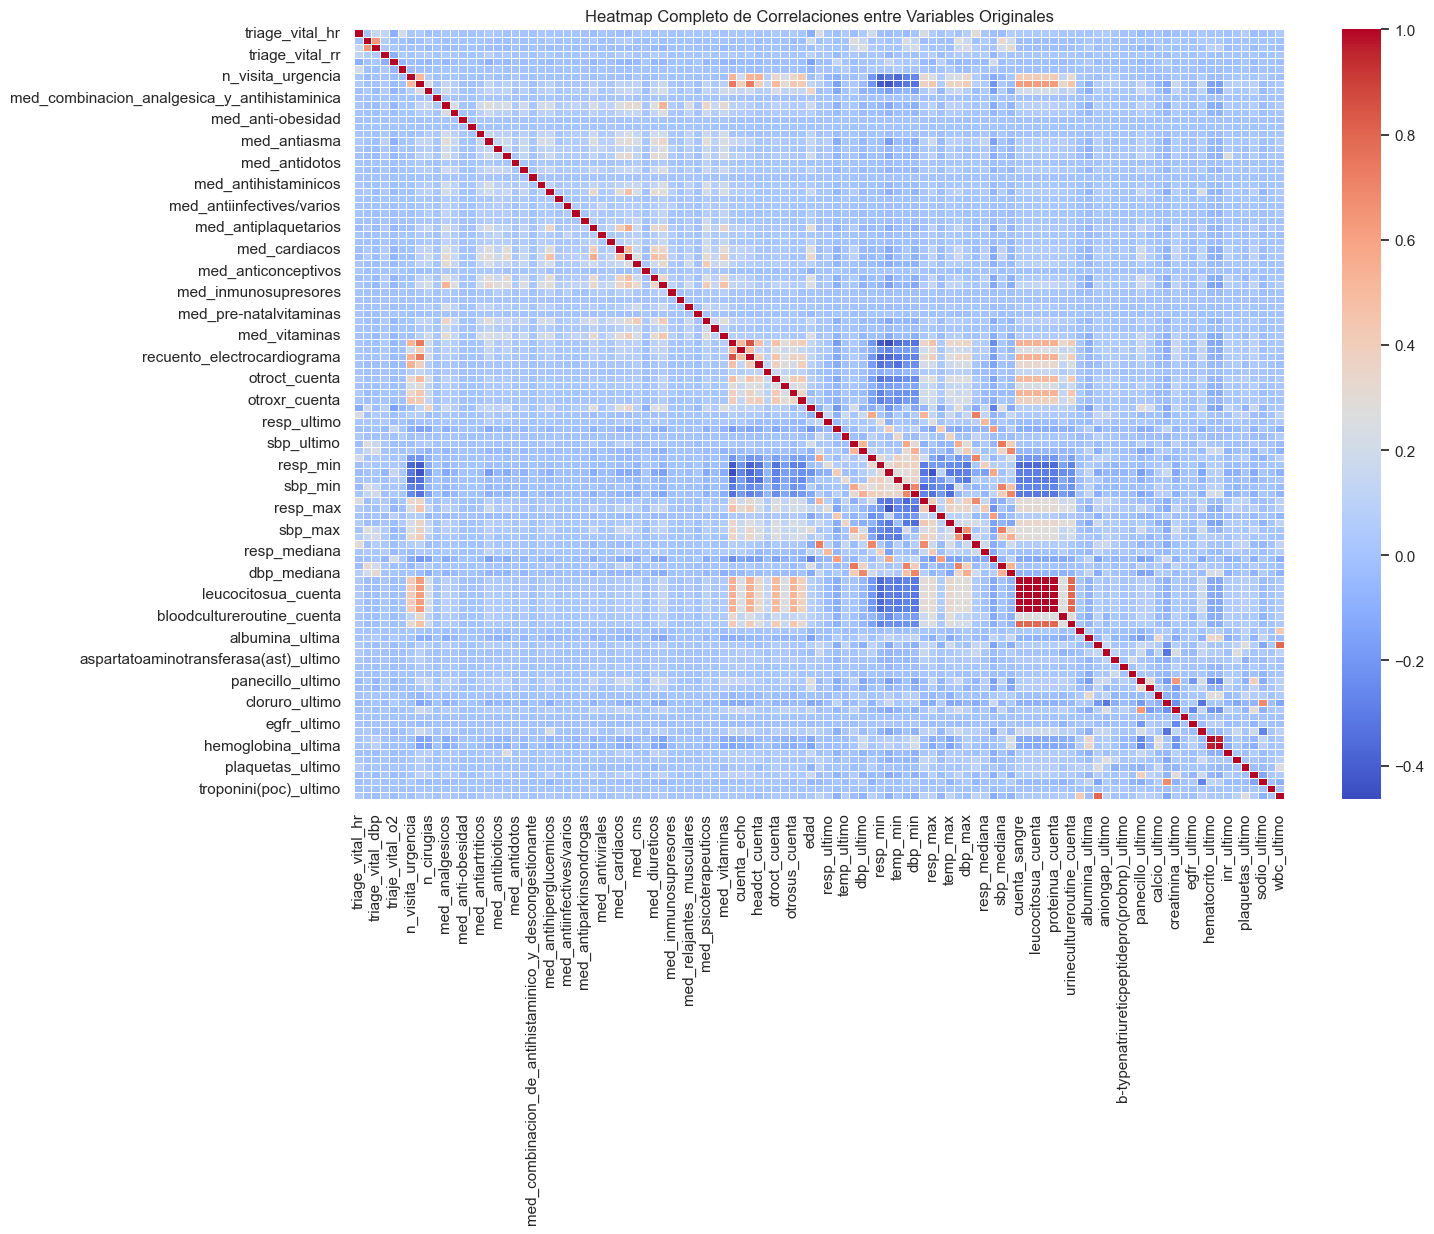

In [29]:
# 1. Calcular la matriz de correlaci칩n de las variables originales
correlation_matrix_original = df_triage_encoded[campos_outliers].corr()

# 2. Visualizar usando un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_original, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Completo de Correlaciones entre Variables Originales')

# Guardar la figura en un archivo (por ejemplo, en formato PNG)
ruta_completa = os.path.join(outputs_path, 'heatmap_correlacion.png')  # Combina la ruta y el nombre del archivo
plt.savefig(ruta_completa, bbox_inches='tight')

# Mostrar el gr치fico en pantalla
plt.show()

In [33]:
print("\nRealizando codificaci칩n one-hot...")

# Convertir todas las columnas de tipo entero a int32
for col in df_triage.select_dtypes(include=['int64', 'int']).columns:
    df_triage[col] = df_triage[col].astype(np.int32)

categorical_columns = ['modo_llegada', 'mes', 'dia', 'llegada_hora_bin', 'TipoCobertura', 'genero']
one_hot_params = config["parameters"]["01_LecturayAnalisis"]["one_hot_encoder"]
encoder = OneHotEncoder(**one_hot_params)
encoded_columns = encoder.fit_transform(df_triage[categorical_columns])  # Devuelve un numpy.ndarray directamente

# Convertir a DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))  # 游댳 Eliminado .toarray()

# Concatenar el dataframe original sin las columnas categ칩ricas y el dataframe codificado
df_triage_encoded = pd.concat([df_triage.drop(columns=categorical_columns), encoded_df], axis=1)

# Guardar en formato Parquet sin incluir la columna de 칤ndice
output_file = os.path.join(parquet_path, "df_triage_encoded.parquet")  # 游댳 Eliminado "encoded" duplicado
metadata = {
    "original_file": dataset_file,
    "categorical_columns": ",".join(categorical_columns)
}

# Convertir a tabla Parquet sin el 칤ndice
parquet_table = pa.Table.from_pandas(df_triage_encoded, preserve_index=False)
for key, value in metadata.items():
    parquet_table = parquet_table.replace_schema_metadata({**parquet_table.schema.metadata, key.encode(): value.encode()})

pq.write_table(parquet_table, output_file)

print(f"\nDataset procesado guardado en: {output_file}")
print(f"Dimensiones finales del dataset: {df_triage_encoded.shape}")


Realizando codificaci칩n one-hot...

Dataset procesado guardado en: c:\Users\Administrador\Documents\PythonScripts\Tesis\tesisaustral\intermediate/encoded\df_triage_encoded.parquet
Dimensiones finales del dataset: (560486, 568)
